In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=.8,random_state=101)

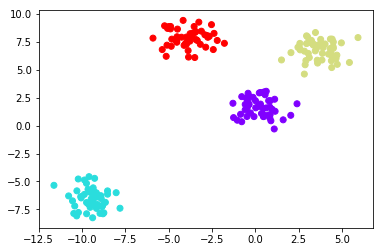

In [4]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans=KMeans(n_clusters=4)

In [7]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.cluster_centers_

array([[-9.44780565, -6.56567735],
       [ 3.68105241,  6.77510172],
       [-3.86203683,  7.83486331],
       [ 0.23218687,  1.65257496]])

In [9]:
kmeans.labels_

array([2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 0, 2, 0, 3,
       3, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       3, 2, 2, 3, 0, 1, 3, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       0, 1, 1, 0, 1, 3, 0, 2, 0, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 3, 2,
       1, 0, 0, 0, 0, 2, 3, 0, 1, 2, 0, 1, 3, 0, 3, 3, 1, 3, 0, 1, 0, 0,
       3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2,
       3, 0, 0, 2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 1, 1,
       0, 3])

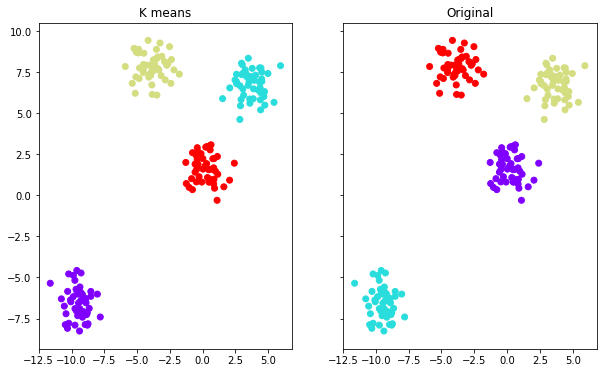

In [10]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [11]:
###College Data
df=pd.read_csv('College_Data')

FileNotFoundError: File b'College_Data' does not exist

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df,hue='Private',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
df[df['Grad.Rate']>100]

In [ ]:
df['Grad.Rate']['Cazenovia College']=100

In [ ]:
df[df['Grad.Rate']>100]

In [ ]:
df[df['Grad.Rate'] > 100]

In [ ]:
df['Grad.Rate']['Cazenovia College'] = 100

In [ ]:
df[df['Grad.Rate'] > 100]

In [ ]:
df.replace(-999, np.nan)

In [ ]:
df[df['Grad.Rate'] > 100]

In [ ]:
df['Grad.Rate']['Cazenovia College'] = 100

In [ ]:
df[df['Grad.Rate'] > 100]

In [ ]:
df.replace(118,100)

In [ ]:
df[df['Grad.Rate'] > 100]

In [ ]:
knn=pd.read_csv('KNN_Project_Data')

In [ ]:
cld=pd.read_csv('Classified Data')

In [ ]:
knn.info()

In [ ]:
knn.head()

In [ ]:
cld.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(cld.drop('TARGET CLASS',axis=1))

In [ ]:
scaled_features=scaler.transform(cld.drop('TARGET CLASS',axis=1))

In [ ]:
cld_feat=pd.DataFrame(scaled_features,columns=cld.columns[:-1])
cld_feat.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,cld['TARGET CLASS'],test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train) 
pred=knn.predict(X_test) 

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))